In [4]:
import sys
sys.path.append("/home/hyunho/sfda")

In [5]:
from torchvision import transforms
import random

class RandomResizedCropWithSeed:
    def __init__(self, size, scale=(0.08, 1.0), ratio=(3. / 4., 4. / 3.)):
        # 마스크 변환에 NEAREST 보간을 적용하여, 픽셀 값이 왜곡되지 않도록 설정
        self.image_transform = transforms.RandomResizedCrop(size, scale=scale, ratio=ratio)
        self.mask_transform = transforms.RandomResizedCrop(size, scale=scale, ratio=ratio, interpolation=transforms.InterpolationMode.NEAREST)

    def __call__(self, img, mask):
        # 동일한 시드를 사용하여 이미지와 마스크를 변환
        seed = random.randint(0, 10000)

        # 같은 시드로 랜덤 크롭 적용
        random.seed(seed)
        img_transformed = self.image_transform(img)

        random.seed(seed)
        mask_transformed = self.mask_transform(mask)

        return img_transformed, mask_transformed

In [8]:
from dataset.gta_loader import SegmentationDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch
import numpy as np

from dataset.cityscapes_loader import CityscapesDataset
image_transforms = transforms.Compose([
    transforms.Resize((512, 1024)),
    transforms.ToTensor(),
    # Add normalization if needed
])

# For the mask, we only need to resize and convert it to tensor
mask_transforms = transforms.Compose([
    transforms.Resize((512, 1024)),
    transforms.Lambda(lambda x: torch.from_numpy(np.array(x, dtype=np.int64)))
])

debug_dataset = CityscapesDataset(
  images_dir="/home/hyunho/sfda/data/cityscapes_dataset/leftImg8bit/train",
  masks_dir="/home/hyunho/sfda/data/cityscapes_dataset/gtFine/train",
  transform = image_transforms,
  target_transform = mask_transforms,
  debug=True
)

debug_dataloader = DataLoader(
  debug_dataset, batch_size=1, shuffle=True, num_workers=0
)

data = next(iter(debug_dataloader))

In [9]:
image, label, name = data

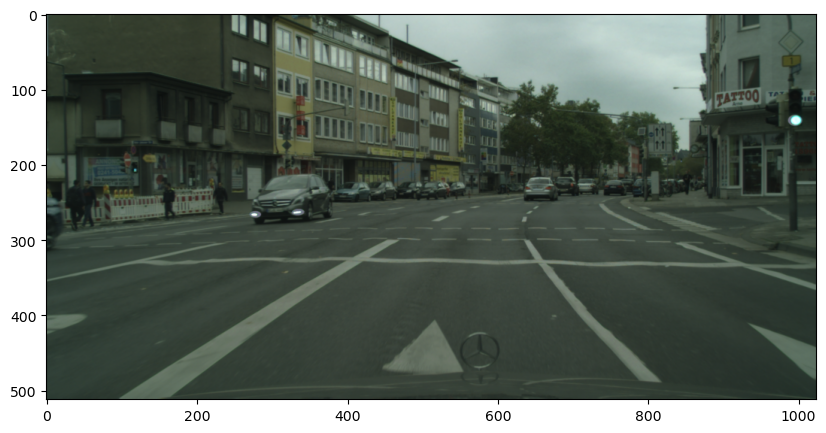

In [16]:
import matplotlib.pyplot as plt

label_image = label[0].cpu().numpy()
input_img = image[0].permute(1, 2, 0).cpu().numpy()

plt.figure(figsize=(10, 5))
plt.imshow(input_img,  cmap='nipy_spectral')

In [19]:
transform = RandomResizedCropWithSeed((512, 1024))
crop_image, crop_label = transform(image, label)

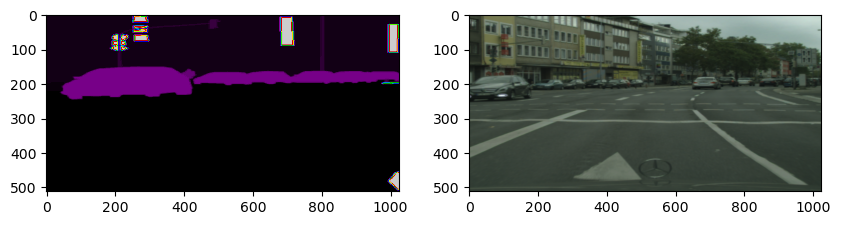

In [22]:
import matplotlib.pyplot as plt

vis_crop_label = crop_label[0].cpu().numpy()
vis_crop_image = crop_image[0].permute(1, 2, 0).cpu().numpy()

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(vis_crop_label,  cmap='nipy_spectral')

plt.subplot(1,2,2)
plt.imshow(vis_crop_image,  cmap='nipy_spectral')